In [1]:
from src.solution import MultiODPath, MultiODSolution
from src.problem import MultiODProblem
from src.operators import *
from src.utils import display_result

p = MultiODProblem(num_O=8, num_taxi=1, seed=1)
paths = [[0, 1, 9, 8, 16, 5, 17, 2, 4, 3, 7, 12, 6, 14, 13, 11, 10, 15, 0]]
paths1 = [[0, 1, 8, 9, 16, 5, 17, 2, 4, 3, 7, 12, 6, 14, 13, 11, 10, 15, 0]]  # sub-optimal
paths2 = [[0, 1, 9, 8, 16, 5, 17, 3, 2, 7, 4, 12, 6, 14, 13, 11, 10, 15, 0]]  # sub-optimal
paths3 = [[i for i in range(18)] + [0]]
s = MultiODSolution(paths3, p)

/usr/local/anaconda3/envs/miniconda3/lib/python3.10/site-packages/gymnasium/envs/registration.py:604: UserWarning: WARN: plugin: shimmy.registration:register_gymnasium_envs raised Traceback (most recent call last):
  File "/usr/local/anaconda3/envs/miniconda3/lib/python3.10/site-packages/gymnasium/envs/registration.py", line 602, in load_plugin_envs
    fn()
  File "/usr/local/anaconda3/envs/miniconda3/lib/python3.10/site-packages/shimmy/registration.py", line 262, in register_gymnasium_envs
    _register_dm_control_envs()
  File "/usr/local/anaconda3/envs/miniconda3/lib/python3.10/site-packages/shimmy/registration.py", line 26, in _register_dm_control_envs
    from shimmy.dm_control_compatibility import DmControlCompatibilityV0
  File "/usr/local/anaconda3/envs/miniconda3/lib/python3.10/site-packages/shimmy/dm_control_compatibility.py", line 18, in <module>
    from gymnasium.envs.mujoco.mujoco_rendering import MujocoRenderer
  File "/usr/local/anaconda3/envs/miniconda3/lib/python3.10

In [2]:
path = s.paths[0]

In [3]:
path 

MultiODPath([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 0])

In [4]:
o1 = TwoOptOperator()
o2 = ExchangeOperator()
o3 = InsertOperator()
o4 = OForwardOperator(length=2)
o5 = DBackwardOperator(length=3)
o6 = ODPairsExchangeOperator()
o7 = RandomODPairsExchangeOperator(change_percentage=0.5)

In [5]:
print(p.calc_cost(s))

8.222732524542375


MultiODPath([0, 1, 2, 4, 6, 3, 9, 7, 8, 5, 10, 12, 14, 11, 17, 15, 16, 13, 0])
True
8.222732524542375


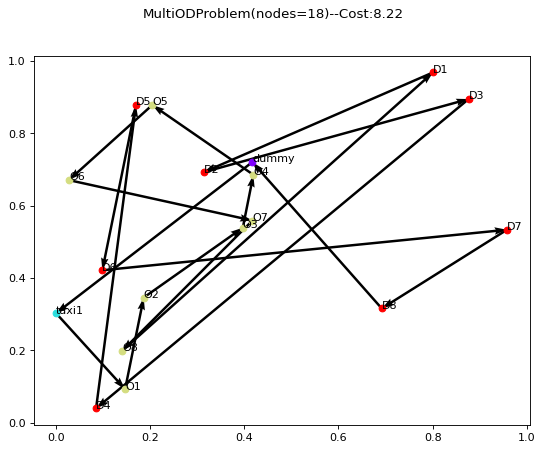

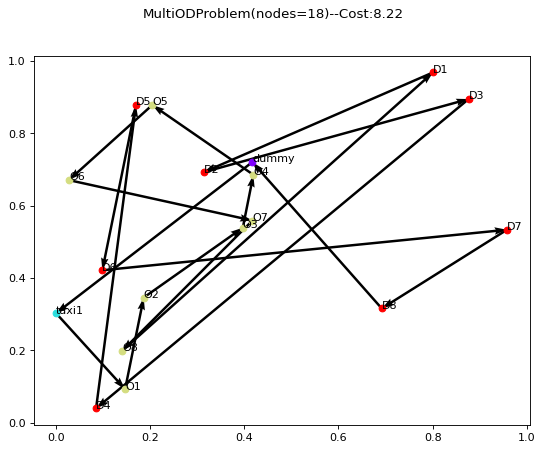

In [6]:
# randomly exchange OD pairs given certain percentage
improved_path, min_delta, label = o7(s)
if improved_path is not None:
    print(improved_path)
    print(p.is_feasible(s))
    print(p.calc_cost(s))
display_result(p, s)

In [7]:
path

MultiODPath([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 0])

In [8]:
# improved_path, min_delta, label = o1(s, 4)
improved_path, min_delta, label = o5(s)
if improved_path is not None:
    print(improved_path)
    print(p.is_feasible(s))
    print(p.calc_cost(s))

MultiODPath([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 13, 14, 15, 10, 11, 12, 16, 17, 0])
True
6.605271324672758


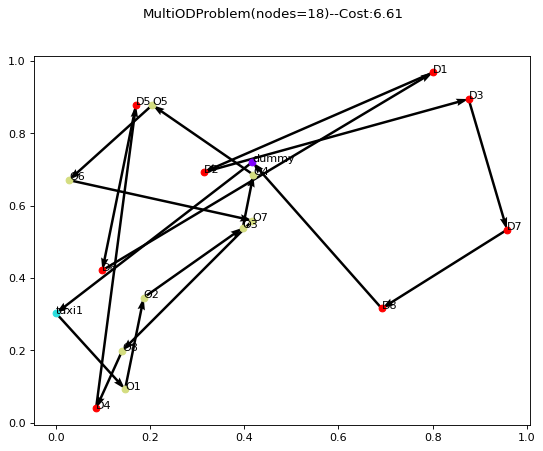

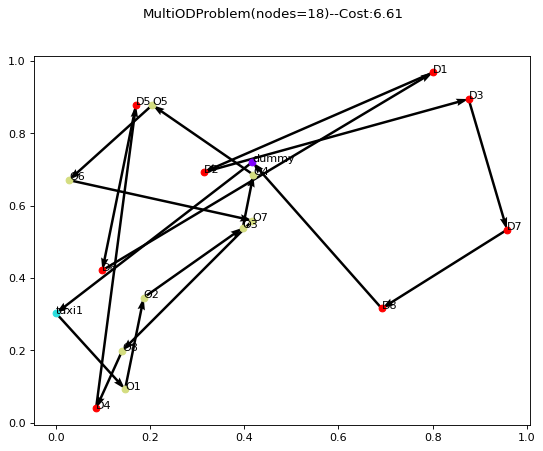

In [9]:
display_result(p, s)

In [10]:
# L2I operators, state

In [11]:
# operators:
# in-block optimization: 2-opt
# O up, D down
# O down, D up 

In [12]:
# OD pairs exchange
improved_path, min_delta, label = o6(s)
if improved_path is not None:
    print(improved_path)
    print(p.is_feasible(s))
    print(p.calc_cost(s))

MultiODPath([0, 1, 3, 2, 4, 5, 6, 7, 8, 9, 13, 14, 15, 11, 10, 12, 16, 17, 0])
True
5.7293509499648785


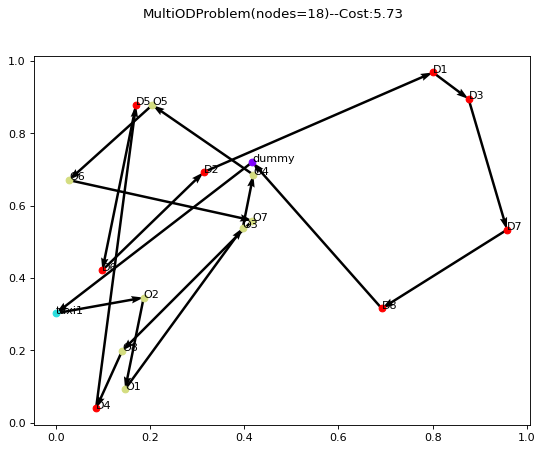

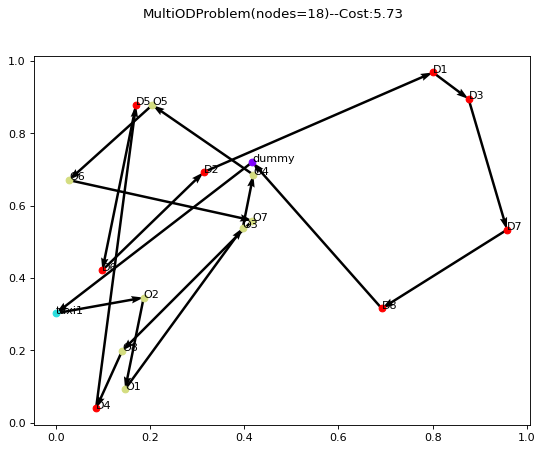

In [13]:
display_result(p, s)